In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Random Forest

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

In [3]:
df = pd.read_pickle("/content/drive/MyDrive/Hamed Presentation /feature_engineering_data.pkl")

In [48]:
df.head(3)

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,channel_sdd,channel_usi,origin_ewx,origin_kam,origin_ldk,origin_lxi,origin_usa,mean_year_price_p1,mean_year_price_p2,mean_year_price_p3
0,24011ae4ebbe3035111d65fa7c15bc57,4.268365,4.739944,0.0,3.041639,0.0,0.444045,0.114481,0.098142,40.606701,...,0,0,0,0,0,1,0,41.067053,22.452760,14.967871
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.0,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,...,0,0,0,1,0,0,0,44.460984,0.007124,0.000000
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.0,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,...,0,0,0,1,0,0,0,44.555962,0.088421,0.000000


In [34]:
from sklearn.model_selection import train_test_split
X = df.drop(["id","churn"], axis = 1)
Y = df["churn"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0, test_size=0.20)

In [35]:
X_train.columns

Index(['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m',
       'forecast_discount_energy', 'forecast_meter_rent_12m',
       'forecast_price_energy_off_peak', 'forecast_price_energy_peak',
       'forecast_price_pow_off_peak', 'has_gas', 'imp_cons',
       'margin_gross_pow_ele', 'nb_prod_act', 'net_margin', 'pow_max',
       'tenure', 'months_to_end', 'months_modif_prod', 'months_renewal',
       'channel_epu', 'channel_ewp', 'channel_fix', 'channel_foo',
       'channel_lmk', 'channel_sdd', 'channel_usi', 'origin_ewx', 'origin_kam',
       'origin_ldk', 'origin_lxi', 'origin_usa', 'mean_year_price_p1',
       'mean_year_price_p2', 'mean_year_price_p3'],
      dtype='object')

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
# instantiate the classifier 

rfc = RandomForestClassifier(random_state=0)



# fit the model

rfc.fit(X_train, y_train)



# Predict the Test set results

y_pred = rfc.predict(X_test)

In [8]:
# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9199


In [11]:
negative = 0
positive = 0
for pred in y_pred:
  if pred == 0:
    negative = negative +1 
  else:
    positive = positive +1 

print("Non churn cases: {}".format(negative))
print("Churn cases: {}".format(positive))

Non churn cases: 2904
Churn cases: 18


In [14]:
y_test.value_counts()

0    2672
1     250
Name: churn, dtype: int64

In [9]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[1,1])

print('\nTrue Negatives(TN) = ', cm[0,0])

print('\nFalse Positives(FP) = ', cm[1,0])

print('\nFalse Negatives(FN) = ', cm[0,1])

Confusion matrix

 [[2671    1]
 [ 233   17]]

True Positives(TP) =  17

True Negatives(TN) =  2671

False Positives(FP) =  233

False Negatives(FN) =  1


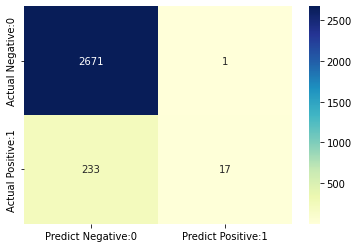

In [15]:
import seaborn as sns
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Predict Negative:0', 'Predict Positive:1'], 
                                 index=['Actual Negative:0', 'Actual Positive:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [16]:
# print classification accuracy
TP = cm[1,1]
TN = cm[0,0]
FP = cm[1,0]
FN = cm[0,1]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9199


In [17]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.0680


Random Forest with n_estimators = 500

In [19]:
clf_500 = RandomForestClassifier(n_estimators=500, random_state=0)
clf_500.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=0)

In [20]:
# Predict the Test set results

y_pred = rfc.predict(X_test)

In [21]:
negative = 0
positive = 0
for pred in y_pred:
  if pred == 0:
    negative = negative +1 
  else:
    positive = positive +1 

print("Non churn cases: {}".format(negative))
print("Churn cases: {}".format(positive))

Non churn cases: 2904
Churn cases: 18


In [22]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[1,1])

print('\nTrue Negatives(TN) = ', cm[0,0])

print('\nFalse Positives(FP) = ', cm[1,0])

print('\nFalse Negatives(FN) = ', cm[0,1])

Confusion matrix

 [[2671    1]
 [ 233   17]]

True Positives(TP) =  17

True Negatives(TN) =  2671

False Positives(FP) =  233

False Negatives(FN) =  1


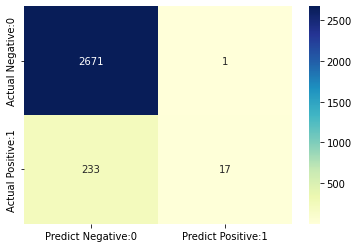

In [23]:
import seaborn as sns
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Predict Negative:0', 'Predict Positive:1'], 
                                 index=['Actual Negative:0', 'Actual Positive:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [24]:
# print classification accuracy
TP = cm[1,1]
TN = cm[0,0]
FP = cm[1,0]
FN = cm[0,1]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9199


In [25]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.0680


In [36]:
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': clf_500.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()

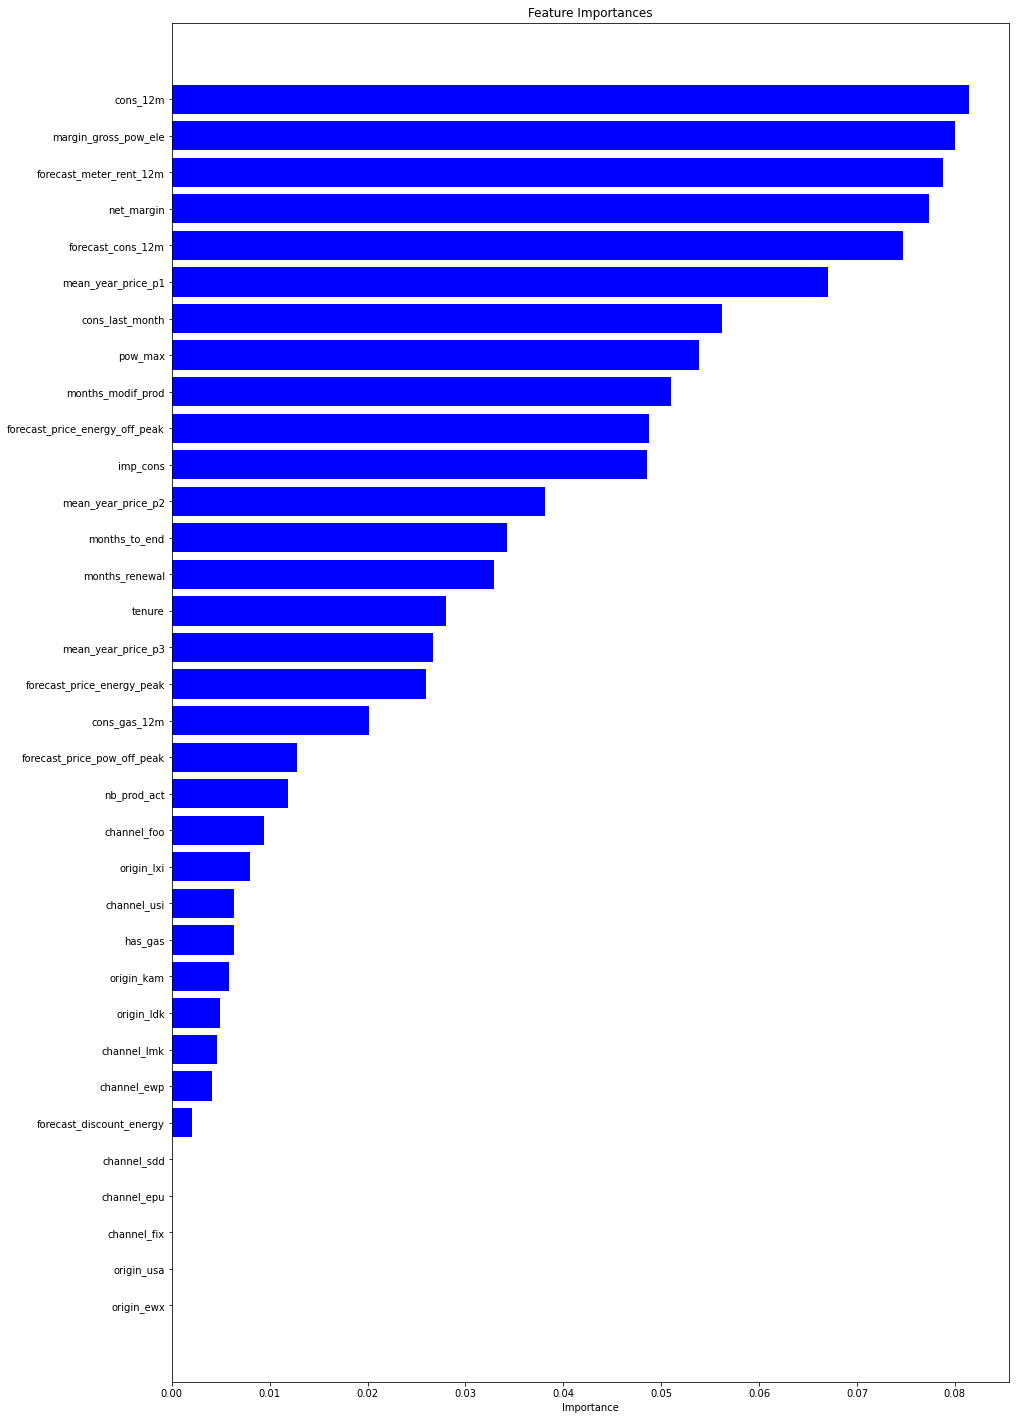

In [38]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'],color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features']) 
plt.xlabel('Importance')
plt.show()

## Hyperparameter Tuning 

In [28]:
param_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 "criterion":['gini', 'entropy', 'log_loss']}

In [29]:
rf = RandomForestClassifier()

In [30]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [31]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


KeyboardInterrupt: ignored

## X G Boost Classifier 

https://xgboost.readthedocs.io/en/stable/python/python_api.html

In [39]:
import xgboost as xgb

In [40]:
xgb_classifier = xgb.XGBClassifier()

In [41]:
xgb_classifier.fit(X_train,y_train)

XGBClassifier()

In [42]:
predictions = xgb_classifier.predict(X_test)

In [43]:
print("Accuracy of Model::",accuracy_score(y_test,predictions))

Accuracy of Model:: 0.9147843942505134


In [44]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[1,1])

print('\nTrue Negatives(TN) = ', cm[0,0])

print('\nFalse Positives(FP) = ', cm[1,0])

print('\nFalse Negatives(FN) = ', cm[0,1])

Confusion matrix

 [[2671    1]
 [ 233   17]]

True Positives(TP) =  17

True Negatives(TN) =  2671

False Positives(FP) =  233

False Negatives(FN) =  1


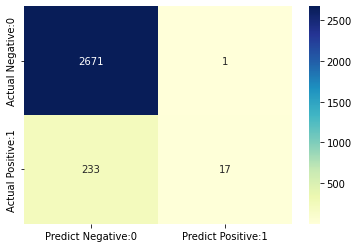

In [45]:
import seaborn as sns
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Predict Negative:0', 'Predict Positive:1'], 
                                 index=['Actual Negative:0', 'Actual Positive:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [46]:
# print classification accuracy
TP = cm[1,1]
TN = cm[0,0]
FP = cm[1,0]
FN = cm[0,1]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9199


In [47]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.0680


## Gradient Boost

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html